In [9]:
ls

bitcoin_30.pkl  currencies.pkl   ethereum_30.pkl  litecoin_30.pkl
bitcoin_60.pkl  dogecoin_60.pkl  ethereum_60.pkl  litecoin_90.pkl
bitcoin_90.pkl  dogecoin_90.pkl  ethereum_90.pkl  sample_data/


In this code:

    The add_currency method adds a new cryptocurrency to the favorite list.
    The view_price method fetches the current price of a given cryptocurrency.
    The plot_price_history method plots the price history of a given cryptocurrency for a specified number of days.
    The favorite list of currencies is simply the keys of the currencies dictionary.
    The recommend_currency method recommends a cryptocurrency based on the sum of percentage changes over a specified number of days.


Added litecoin to the list of currencies.
The current price of bitcoin is 30556 USD.


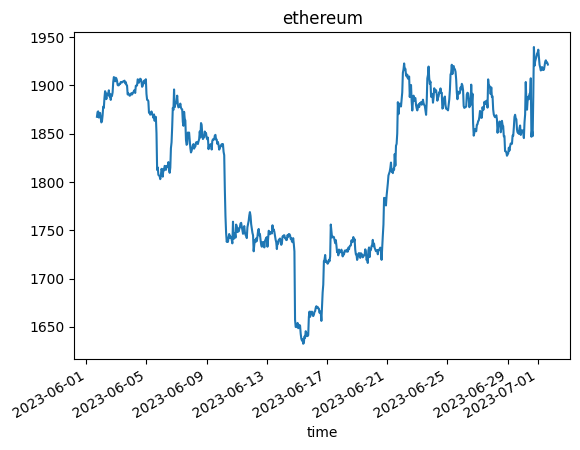

Favorite currencies:  ['bitcoin', 'ethereum', 'dogecoin', 'litecoin']
Recommended currency: bitcoin
Percentage changes: {'bitcoin': 0.13451145863172598, 'ethereum': 0.03601089455657347, 'litecoin': 0.12360228814807339}


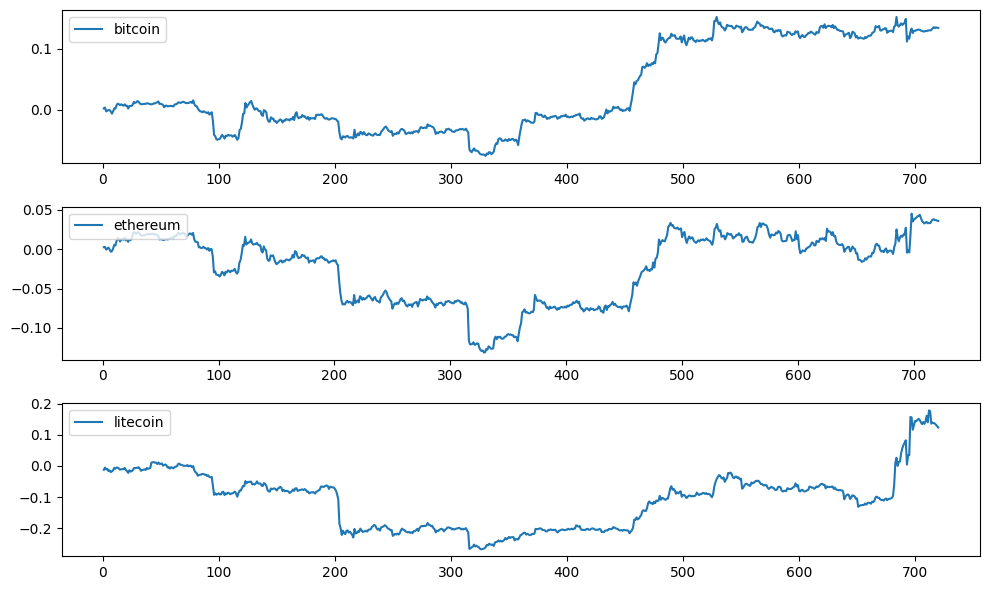

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

class CryptoBot:
    def __init__(self):
        self.base_url = 'https://api.coingecko.com/api/v3/'
        self.currencies = {}  # Store added currencies
        self.load_currencies()

    def load_currencies(self):
        try:
            with open('currencies.pkl', 'rb') as f:
                self.currencies = pickle.load(f)
        except FileNotFoundError:
            self.currencies = {}

    def save_currencies(self):
        with open('currencies.pkl', 'wb') as f:
            pickle.dump(self.currencies, f)

    def add_currency(self, currency):
        # Add the new currency to the dictionary
        self.currencies[currency] = True
        print(f"Added {currency} to the list of currencies.")
        self.save_currencies()

    def view_price(self, currency):
        # Fetch the current price of the given currency
        url = self.base_url + f'coins/{currency}'
        response = requests.get(url)
        data = response.json()
        print(f"The current price of {currency} is {data['market_data']['current_price']['usd']} USD.")

    def fetch_or_load_price_data(self, currency, days):
        filename = f'{currency}_{days}.pkl'
        if os.path.exists(filename):
            with open(filename, 'rb') as f:
                data = pickle.load(f)
        else:
            url = self.base_url + f'coins/{currency}/market_chart'
            params = {'vs_currency': 'usd', 'days': days}
            response = requests.get(url, params=params)
            data = response.json()
            if 'prices' in data:
                data['time'] = [x[0] for x in data['prices']]
                data['price'] = [x[1] for x in data['prices']]
                del data['prices']
            with open(filename, 'wb') as f:
                pickle.dump(data, f)
        return data

    def remove_currency(self, currency):
        # Remove the currency from the dictionary
        if currency in self.currencies:
            del self.currencies[currency]
            print(f"Removed {currency} from the list of currencies.")
            self.save_currencies()
        else:
            print(f"{currency} is not in the list of currencies.")

    def plot_price_history(self, currency, days):
        filename = f'{currency}_{days}.pkl'
        if os.path.exists(filename):
            with open(filename, 'rb') as f:
                data = pickle.load(f)
            if 'time' in data:
                df = pd.DataFrame(data)
                df['time'] = pd.to_datetime(df['time'], unit='ms')
                df.set_index('time', inplace=True)
                if 'price' in df.columns:
                    df['price'].plot()
                    plt.title(currency)
                    plt.show()
                else:
                    print(f'No price data for {currency}')
            else:
                print(f'No time data for {currency}')
        else:
            print(f'No offline data available for {currency}')

    def recommend_currency(self, currencies, days):
        changes = {}
        fig, axs = plt.subplots(len(currencies), figsize=(10, 6))

        for i, currency in enumerate(currencies):
            data = self.fetch_or_load_price_data(currency, days)
            df = pd.DataFrame(data)
            df['change'] = df['price'].pct_change()
            changes[currency] = df['change'].sum()

            # Plot the percentage change over time
            axs[i].plot(df['change'].cumsum(), label=currency)
            axs[i].legend(loc='upper left')

        recommended = max(changes, key=changes.get)
        print('Recommended currency:', recommended)
        print('Percentage changes:', changes)

        # Show the plot
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    bot = CryptoBot()

    # 1- Adding a currency
    bot.add_currency('litecoin')

    # 2- Viewing the price of cryptocurrency
    bot.view_price('bitcoin')

    # 3- View the chart of changes of a currency
    bot.plot_price_history('ethereum', 30)

    # 4- Favorite list (already added currencies)
    print("Favorite currencies: ", list(bot.currencies.keys()))

    # 5- Checking the daily chart and comparing currencies
    bot.recommend_currency(['bitcoin', 'ethereum', 'litecoin'], 30)


    Adding a currency code:

This method allows you to add a new cryptocurrency to your list of tracked cryptocurrencies. Here are a few examples of adding different cryptocurrencies:

In [11]:
bot.add_currency('bitcoin')
bot.add_currency('ethereum')
bot.add_currency('dogecoin')

Added bitcoin to the list of currencies.
Added ethereum to the list of currencies.
Added dogecoin to the list of currencies.



    Viewing the price of a cryptocurrency:

This method fetches and prints the current price of a specified cryptocurrency. Here are some examples:

In [12]:
bot.view_price('bitcoin')
bot.view_price('ethereum')
bot.view_price('dogecoin')

The current price of bitcoin is 30555 USD.
The current price of ethereum is 1920.41 USD.
The current price of dogecoin is 0.068105 USD.



    Viewing the chart of changes of a currency:

This method plots the price history of a given cryptocurrency for a specified number of days. You can use it to visualize the price trends of your cryptocurrencies:

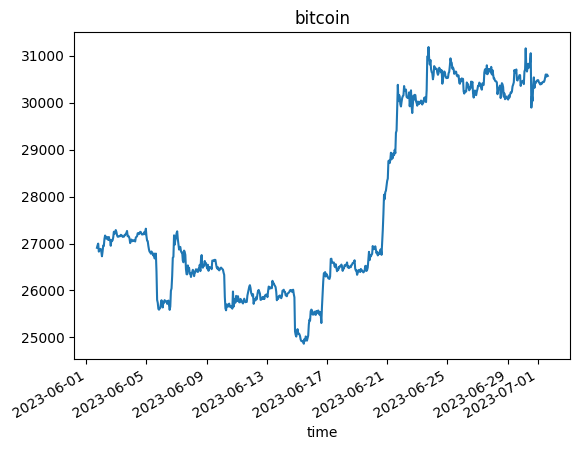

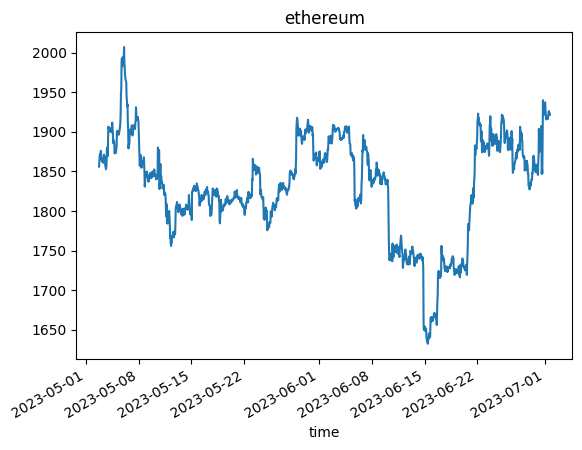

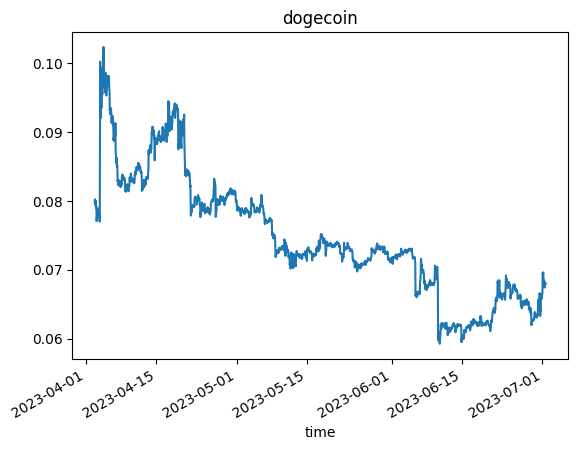

In [13]:
bot.plot_price_history('bitcoin', 30)
bot.plot_price_history('ethereum', 60)
bot.plot_price_history('dogecoin', 90)

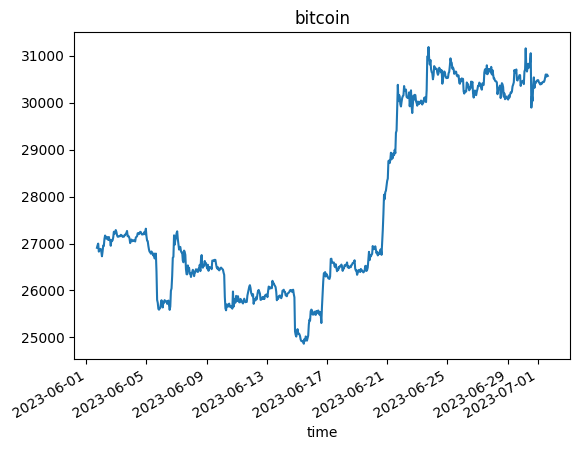

In [14]:
# Plot the price history of 'bitcoin' using offline data
bot.plot_price_history('bitcoin', 30)


    Favorite list:

The favorite list is simply the list of cryptocurrencies you're tracking. You can view it like this:

In [15]:
print("Favorite currencies: ", list(bot.currencies.keys()))

Favorite currencies:  ['bitcoin', 'ethereum', 'dogecoin', 'litecoin']


In [16]:
# Print the current favorite list
print("Favorite currencies: ", list(bot.currencies.keys()))

# Remove 'litecoin' from the favorite list
bot.remove_currency('litecoin')

# Print the updated favorite list
print("Favorite currencies after removal: ", list(bot.currencies.keys()))

Favorite currencies:  ['bitcoin', 'ethereum', 'dogecoin', 'litecoin']
Removed litecoin from the list of currencies.
Favorite currencies after removal:  ['bitcoin', 'ethereum', 'dogecoin']



    Checking the daily chart and comparing currencies:

This method compares the price trends of your cryptocurrencies and recommends one based on the sum of percentage changes over a specified number of days. Here are some examples:

Recommended currency: bitcoin
Percentage changes: {'bitcoin': 0.13451145863172598, 'ethereum': 0.03601089455657347}


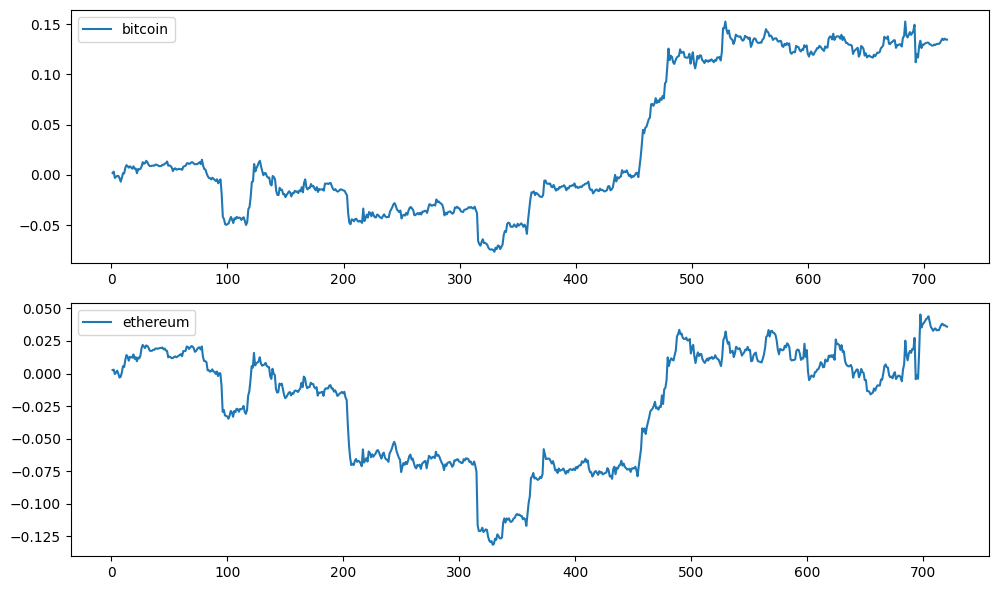

Recommended currency: bitcoin
Percentage changes: {'bitcoin': 0.08267584130886341, 'ethereum': 0.04678112973602022, 'dogecoin': -0.1125552987697358}


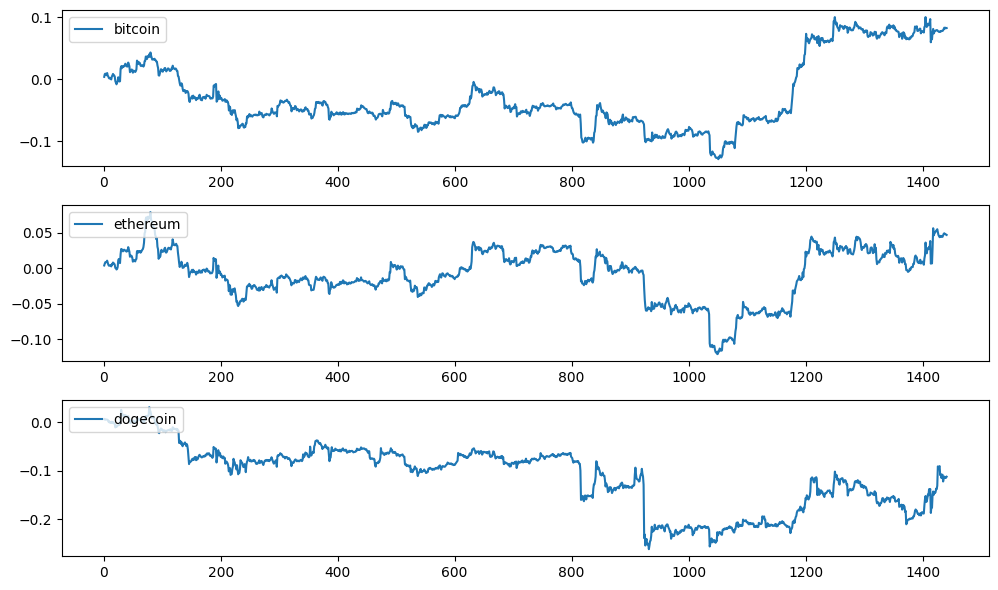

Recommended currency: litecoin
Percentage changes: {'bitcoin': 0.10137028135482362, 'ethereum': 0.08793190829233699, 'dogecoin': -0.08384510279825663, 'litecoin': 0.18854294698843488}


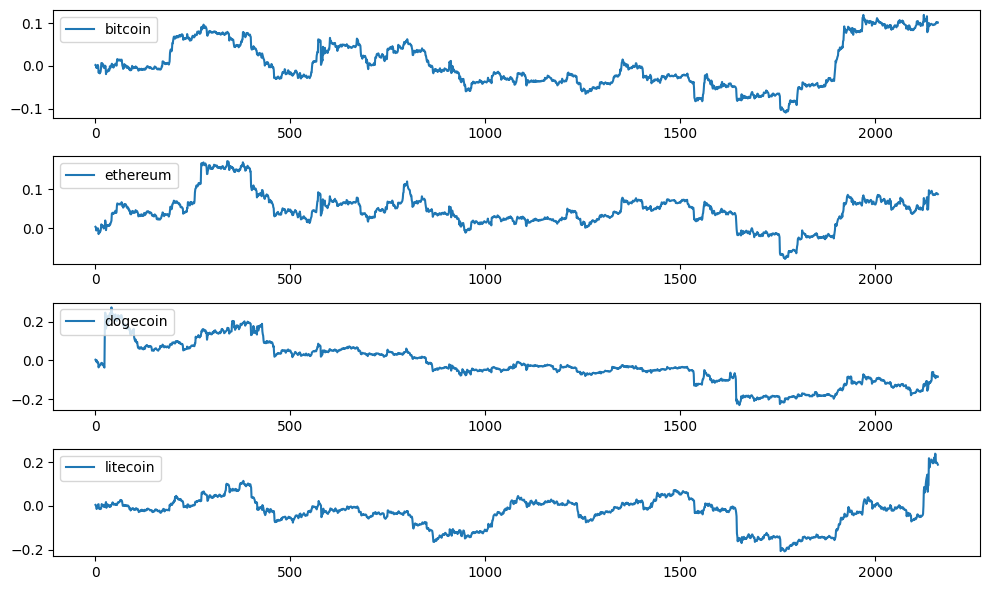

In [17]:
bot.recommend_currency(['bitcoin', 'ethereum'], 30)
bot.recommend_currency(['bitcoin', 'ethereum', 'dogecoin'], 60)
bot.recommend_currency(['bitcoin', 'ethereum', 'dogecoin', 'litecoin'], 90)